# Getting the data

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
x_train = X[:60000]
x_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [18]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"weights": ["uniform", "distance", "callable"], 
     "n_neighbors": [4, 6, 8, 10]},
]


grid_search = GridSearchCV(knn_clf, param_grid, cv=3,
                           scoring = "accuracy")

grid_search.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
16 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 196, in fit
    self.weights = _check_weights(self.weights)
  File "/Library/Frameworks/Python.framework/Versi

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [4, 6, 8, 10],
                          'weights': ['uniform', 'distance', 'callable']}],
             scoring='accuracy')

In [20]:
final_estimator = grid_search.best_estimator_
y_train_predicted = final_estimator.predict(x_train)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [26]:
def print_scores(predicted_values, actual_values):
    print("Accuracy score is: {}".format(accuracy_score(predicted_values, actual_values)))
    print("Precision score is: {}".format(precision_score(predicted_values, actual_values)))
    print("Recall score is: {}".format(recall_score(predicted_values, acutal_values)))


In [28]:
predicted_test_values = final_estimator.predict(x_test)

In [29]:
correct_values = (predicted_test_values == y_test)
print(sum(correct_values) / len(correct_values))

0.9714


In [37]:
conf_mx = confusion_matrix(y_test, predicted_test_values)
conf_mx

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  10,    5,  995,    2,    1,    0,    0,   16,    3,    0],
       [   0,    1,    3,  974,    1,   14,    1,    7,    4,    5],
       [   1,    5,    0,    0,  950,    0,    4,    3,    0,   19],
       [   4,    0,    0,    9,    2,  862,    7,    1,    3,    4],
       [   4,    2,    0,    0,    3,    3,  946,    0,    0,    0],
       [   0,   17,    4,    0,    3,    0,    0,  994,    0,   10],
       [   5,    2,    4,   14,    5,   11,    4,    4,  920,    5],
       [   3,    4,    2,    7,    9,    4,    1,   10,    1,  968]])

In [39]:
import matplotlib.pyplot as plt

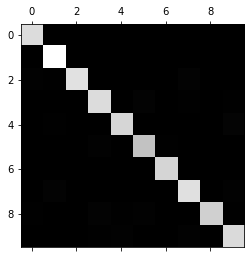

In [40]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# The task is Done, accuracy = 0.9714